# Hands on: Clustering Analysis
## with PCA

### Overview

- [Customer segmentation problem] <a name="chi_problem"></a>

- [The Data](#chi)</a>

- [Import the file customer.csv to a dataframe](#chapi_1)</a>

- [Obtain info and summary of the data](#chapi_2)</a>

-----------------

[1. (some) Exploratory data analysis](#ch1)</a>
   - [1.1 Numeric Variables](#ch1_1)</a>
   - [1.2 Categorical Variables](#ch1_2)</a>
   - [1.3 Multivariate Analysis](#ch1_3)</a>
   - [1.4 Relation between pairs of attributes](#ch1_4)</a>


[2. Data Preprocessing](#ch2)</a>

[3. Clustering the data](#ch3)</a>
   - [3.1 Find the optimal number of clusters](#ch3_1)</a>
      - [3.1.1 Using the elbow method](#ch3_1_1)</a>
      - [Question](#chq_1)</a>
      - [3.1.2 Using the silhouette coefficient method](#ch3_1_2)</a>
      - [Question](#chq_2)</a>
   - [3.2 K-means clustering](#ch3_2)</a>
   - [3.3 Quantifying the quality of clustering ](#ch3_3)</a>
   - [3.4 Summary statistics of each cluster](#ch3_4)</a>
   - [3.5 Visualize the segmented customers](#ch3_5)</a>
      - [Age vs Income](#ch3_5_1)</a>
      - [Education vs Income](#ch3_5_2)</a>
     
[4. Improve k-means with PCA](#ch4)</a>
   - [4.1 Plot the explained variance against the number of components](#ch4_1)</a>
   - [Question](#chq_3)</a>
   - [4.2 New correlation matrix for the four selected components](#ch2_2)</a>
   - [4.3 Implementing K-Means Clustering](#ch4_3)</a>
   - [Question](#chq_4)</a>
   - [4.4 Analyze segmentation results](#ch4_4)</a>
   - [4.5 Visualization of the segments](#ch4_5)</a>
   

[5. Further work](#ch_fw)</a>
   - [FW-4.3 ](#ch_fw_4_3)</a>
   - [FW-4.4 ](#ch_fw_4_4)</a>
   - [FW-4.5](#ch_fw_4_5)</a>
   - [FW-conclusions](#ch_fw_conc)</a>


In [1]:
# to execute and return the results of executions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Customer segmentation problem <a name="chi_problem"></a>
### Customer segmentation is the subdivision of a market into discrete customer groups that share similar characteristics

# The Data <a name="ch_data"></a>
### The customer dataset contains customer details of 2000 individuals as well as their purchase activities 

**It has seven demographic and geographic variables for each customer**

The attributes are:
- `Sex`
- `Marital status`
- `Age`
- `Education`
- `Income`
- `Occupation`
- `Settlement size`

| Variable | Data Type | Range | Description |
| --- | --- | --- | --- |
| ID | numerical | Integer | Shows a unique identificator of a customer. |
| Sex | categorical | {0,1} | Biological sex (gender) of a customer. 0 = male / 1 = female |
| Marital status | categorical | {0,1} | Marital status of a customer. 0 = single / 1 = non-single |
| Age | numerical | Integer | The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset (Min. age = 18 / Max. age = 78) |
| Education | categorical | {0,1,2,3} | Level of education of the customer. 0=no education / 1=high-school / 2=university / 3=graduate |
| Income | numerical | Real | Self-reported annual income in US dollars of the customer. |
| Occupation | categorical | {0,1,2} | Category of occupation of the customer. 0=unemployed / 1=employee/oficial / 2=management or self-employed |
| Settlement size | categorical | {0,1,2} | The size of the city that the customer lives in. 0=small / 1=mid-size / 2=big |


## Import the file customers.csv to a dataframe (csv file is available in eLearning). <a name="chapi_1"></a>

### Import  Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

sns.set()

### Import  Dataset

In [3]:
import numpy as np
import pandas as pd
df_customers = pd.read_csv("customers.csv")
df_customers.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
684,100000685,0,0,31,0,171857,0,0
1163,100001164,0,0,39,1,135837,2,2
569,100000570,1,1,31,1,156700,1,1
1224,100001225,0,0,33,1,116261,1,2
1296,100001297,0,0,33,1,151339,2,1


## Obtain info and summary of the data  <a name="chapi_2"></a>

In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


**Define categorical and numeric attributes**

In [5]:
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']

df_customers_cat = df_customers[cat_columns].astype('str')
df_customers_cat.describe().T
df_customers_num = df_customers[num_columns]
df_customers_num.describe().T


,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


# 1. (some) Exploratory data analysis <a name="ch1"></a>

## 1.1. Numeric Variables <a name="ch1_1"></a>

<Figure size 800x400 with 0 Axes>

StopIteration: 

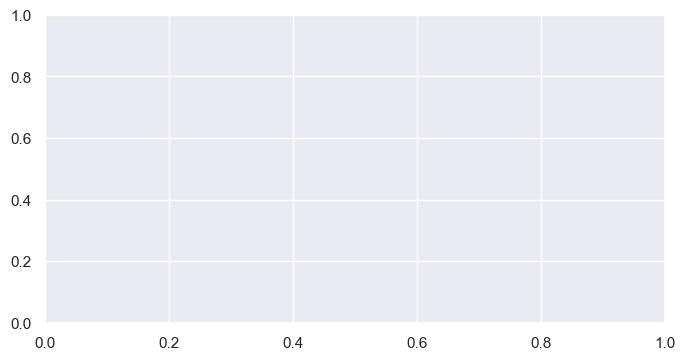

In [6]:
for numerical in num_columns:
    if numerical == 'ID': continue 
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_customers, x=numerical )

- `Age` and `Income` have a right skew
(...)

## 1.2. Categorical Variables <a name="ch1_2"></a>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Sex', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Marital status', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Education', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Occupation', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Settlement size', ylabel='count'>

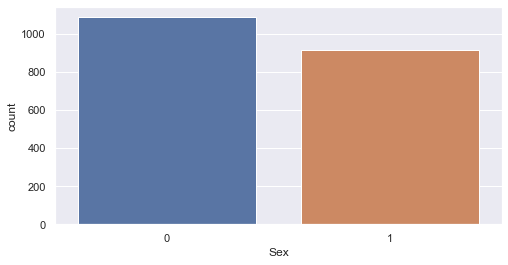

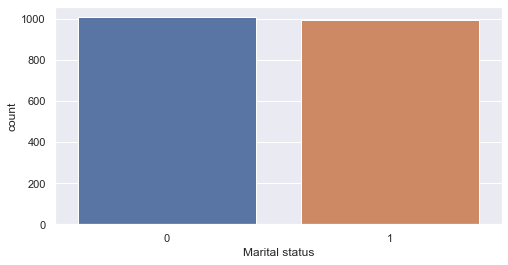

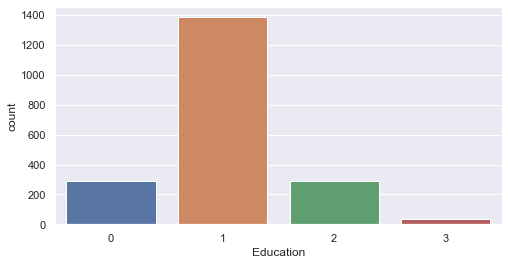

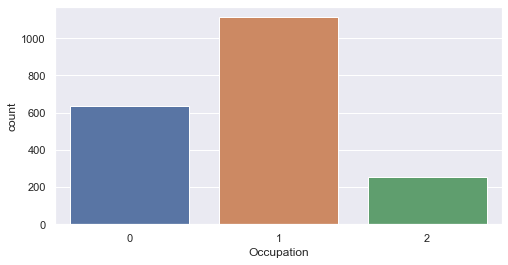

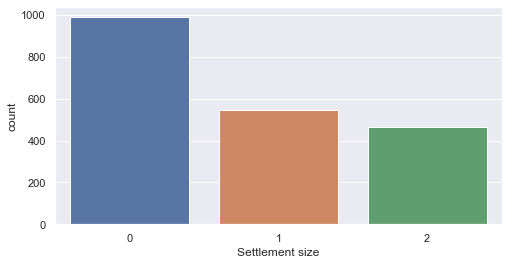

In [ ]:
for category in cat_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_customers, x=category)
    

- `Sex` and `Marital status` are balanced 
- `Education`: most customers have highschool level education (considering join both categories ('2' and '3') in a category called university & over)
- Both the `Occupation` and `Settlement size` attributes seem to have a larger enough quantity of instances of each category

##  1.3. Multivariate Analysis <a name="ch1_3"></a>

## ...

In [ ]:
# place your coed here!

## 1.4. Try to understand the relation between pairs of attributes (observe the correlation using a heat map) <a name="ch1_4"></a>

<Figure size 864x648 with 0 Axes>

[Text(0.5, 0, 'ID'),
 Text(1.5, 0, 'Sex'),
 Text(2.5, 0, 'Marital status'),
 Text(3.5, 0, 'Age'),
 Text(4.5, 0, 'Education'),
 Text(5.5, 0, 'Income'),
 Text(6.5, 0, 'Occupation'),
 Text(7.5, 0, 'Settlement size')]

Text(0.5, 1.0, 'Correlation Matrix')

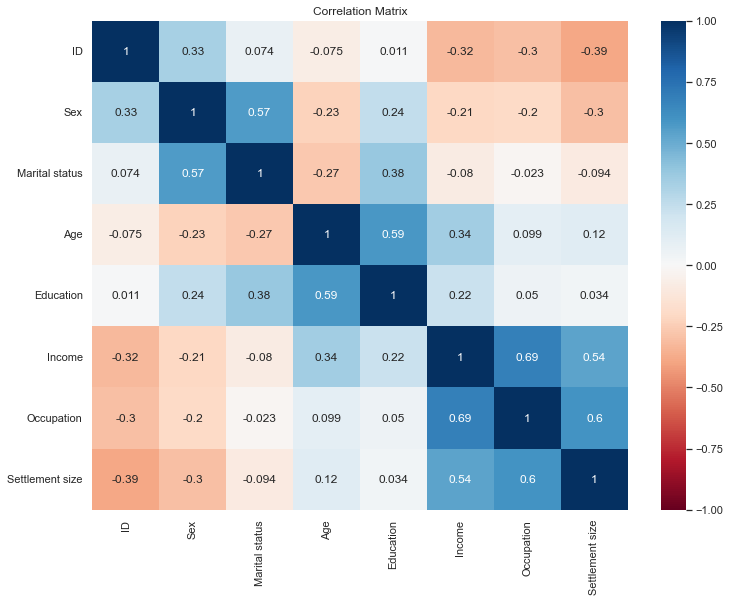

In [ ]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(df_customers.corr('spearman'),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

# 2. Data Preprocessing <a name="ch2"></a>

### Missing values

**There are no missing values (see .info())**

##2.1. Standardize the dataframe

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers_scaled= scaler.fit_transform(df_customers)

# 3. Clustering the data <a name="ch3"></a>

## 3.1. Find the optimal number of clusters <a name="ch3_1"></a>

### 3.1.1. Using the elbow method to find the optimal number of clusters <a name="ch3_1_1"></a>
 ----K-means++ is considered the best way to initialize the centroids
 
 --- experimental strategy to choose K ( the number of clusters)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

KMeans(n_clusters=10, random_state=0)

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Distortion')

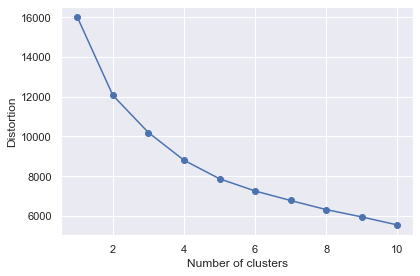

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(customers_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## Question:   <a name="chq_1"></a>

**What is the meaning of the parameter inertia?**

### 3.1.2. Using the silhouette coefficient method to find the optimal number of clusters <a name="ch3_1_2"></a>

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(2, 10),
                 metric='silhouette')

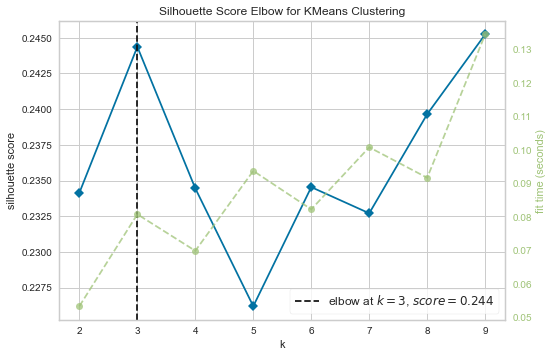

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(customers_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Question:   <a name="chq_2"></a>

**What is the "optimal" numnber of clusters?**

## 3.2. K-means clustering <a name="ch3_2"></a>

### K-means clustering with 3 clusters

In [ ]:
optNumbClusters = 3;
km = KMeans(n_clusters = optNumbClusters, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(customers_scaled)

## 3.3. Quantifying the quality of clustering via silhouette plots <a name="ch3_3"></a>

<BarContainer object of 791 artists>

<BarContainer object of 920 artists>

<BarContainer object of 289 artists>

([<matplotlib.axis.YTick at 0x25023d22b80>,
 [Text(0, 395.5, '1'), Text(0, 1251.0, '2'), Text(0, 1855.5, '3')])

Text(0, 0.5, 'Cluster')

Text(0.5, 0, 'Silhouette coefficient')

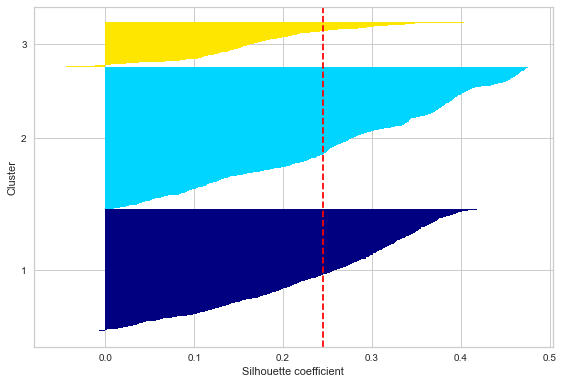

Silhouette coef =  0.24437057324500533


In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm


cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(customers_scaled, y_km, metric='euclidean')


y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

print('Silhouette coef = ', silhouette_avg)

### OR...

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=0))

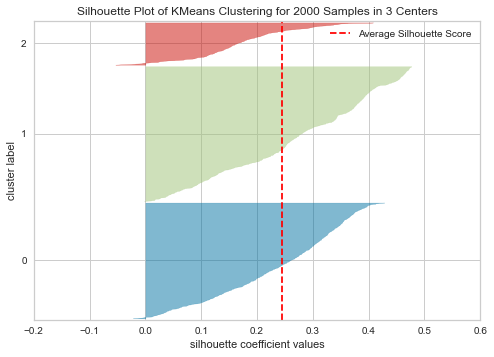

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the visualizer for the clustering model km
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(customers_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## 3.4. Summary statistics of each cluster <a name="ch3_4"></a>
###  try to understand the characteristics of the people in each cluster

In [ ]:
df_customers_kmeans = df_customers.copy()
df_customers_kmeans['Segment'] = km.labels_  # It will contain the predicted clusters for each observation in our data set
df_customers_kmeans.sample(5)

df_customers_kmeans.groupby('Segment')['ID'].nunique()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
484,100000485,0,0,44,1,133265,1,2,0
1142,100001143,0,0,64,2,136312,0,2,2
1406,100001407,1,0,27,1,78923,0,0,1
1745,100001746,1,1,30,1,116399,1,0,1
967,100000968,1,1,54,2,174424,2,2,2


Segment
0    791
1    920
2    289
Name: ID, dtype: int64

In [ ]:
num_columns = ['ID','Age','Income', 'Segment']
cat_columns = ['ID', 'Sex','Marital status','Education','Occupation','Settlement size', 'Segment']

### Cluster 0

(791, 9)

<AxesSubplot:xlabel='Age', ylabel='Count'>

<AxesSubplot:xlabel='Income', ylabel='Count'>

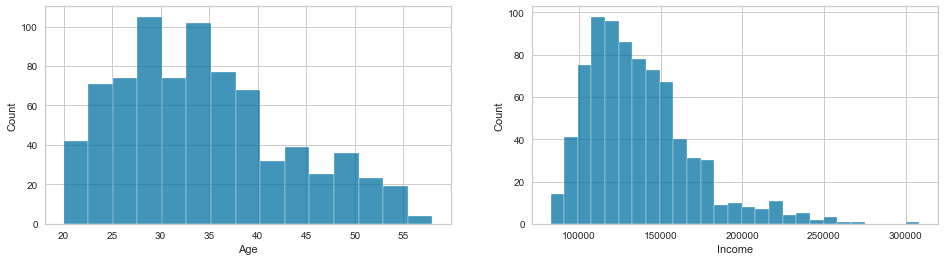

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Sex', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Marital status', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Education', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Occupation', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Settlement size', ylabel='count'>

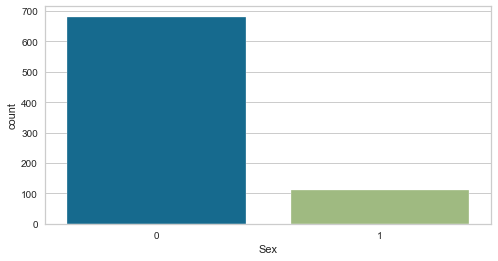

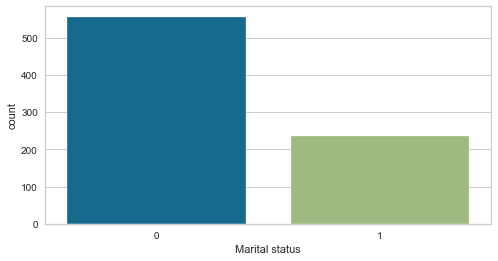

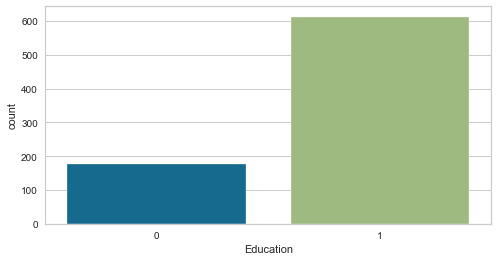

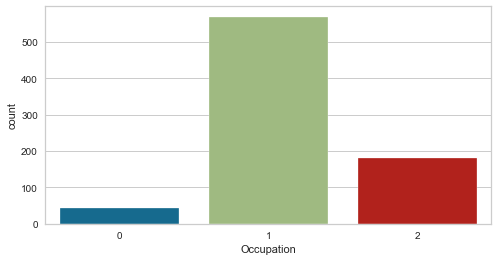

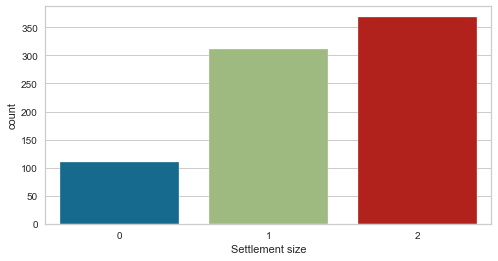

In [ ]:
df_cluster0 = df_customers_kmeans[df_customers_kmeans['Segment'] == 0]
df_cluster0.shape

fig, axes = plt.subplots(1, 2, figsize=(16,4))
ind=-1
for numerical in num_columns:
    if numerical == 'ID' or numerical == 'Segment': continue 
    ind=ind+1
    sns.histplot(data=df_cluster0, x=numerical, ax=axes[ind])
    
plt.show()

for category in cat_columns:
    if category == 'ID' or category == 'Segment': continue 
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_cluster0, x=category)


### Conclusion Cluster 0:

**Characteristics of this cluster:**
- Mostly non-single men
- education is high-school level or above
- generally, employee/oficial
- live in big cities
- age, mostly, between 20 and 40 
- low-medium income



### Cluster 1

(920, 9)

<AxesSubplot:xlabel='Age', ylabel='Count'>

<AxesSubplot:xlabel='Income', ylabel='Count'>

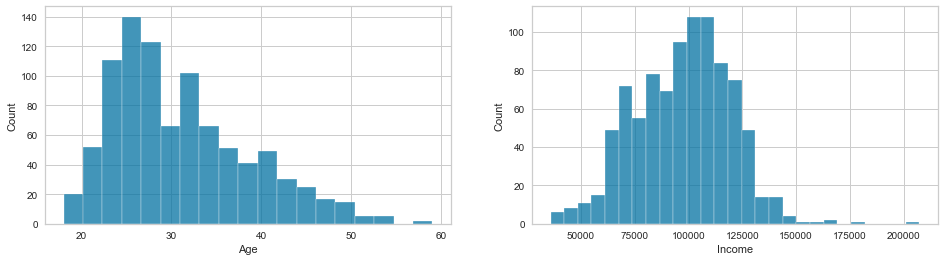

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Sex', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Marital status', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Education', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Occupation', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Settlement size', ylabel='count'>

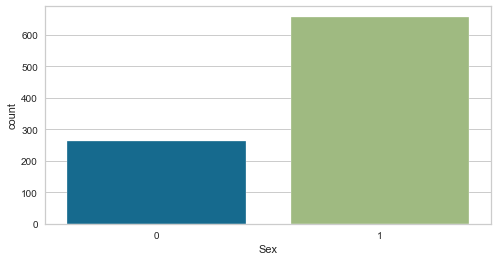

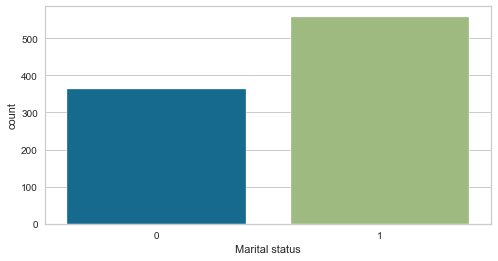

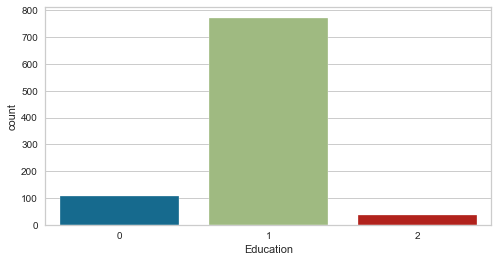

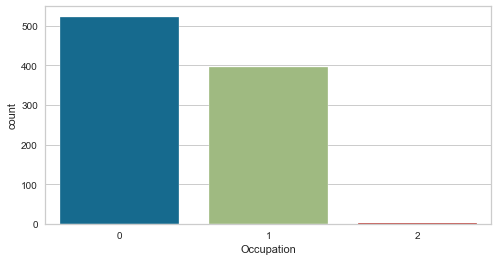

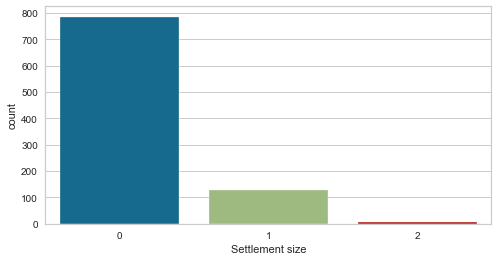

In [ ]:
df_cluster1 = df_customers_kmeans[df_customers_kmeans['Segment'] == 1]
df_cluster1.shape

fig, axes = plt.subplots(1, 2, figsize=(16,4))
ind=-1
for numerical in num_columns:
    if numerical == 'ID' or numerical == 'Segment': continue 
    ind=ind+1
    sns.histplot(data=df_cluster1, x=numerical, ax=axes[ind])
    
plt.show()

for category in cat_columns:
    if category == 'ID' or category == 'Segment': continue 
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_cluster1, x=category)


### Conclusion Cluster 1:

**Characteristics of this cluster:**
## (...)


### Cluster 2

(289, 9)

<AxesSubplot:xlabel='Age', ylabel='Count'>

<AxesSubplot:xlabel='Income', ylabel='Count'>

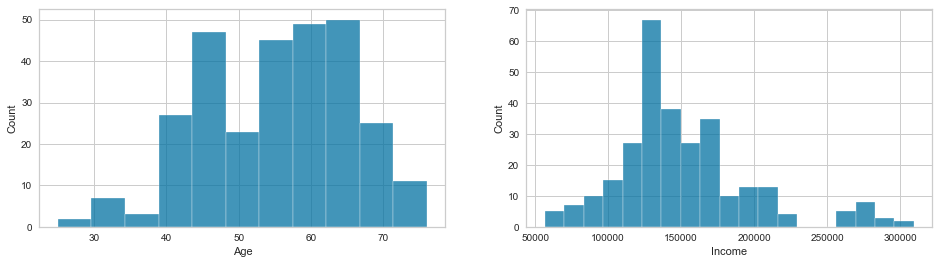

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Sex', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Marital status', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Education', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Occupation', ylabel='count'>

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Settlement size', ylabel='count'>

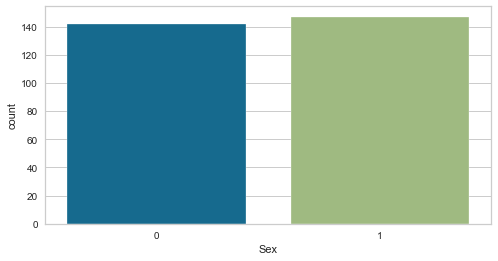

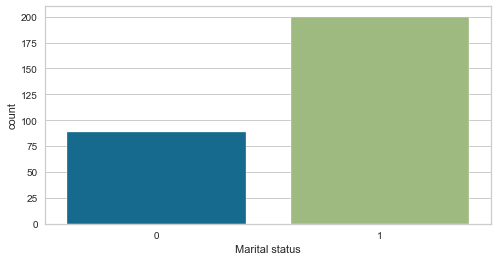

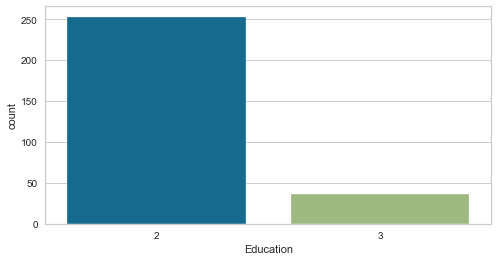

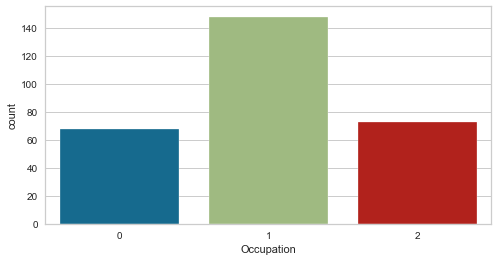

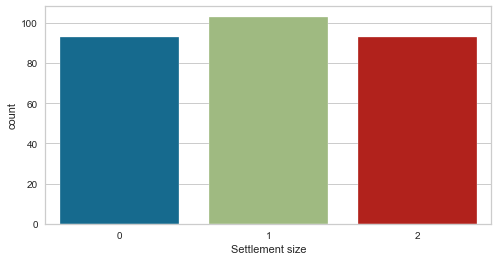

In [ ]:
df_cluster2 = df_customers_kmeans[df_customers_kmeans['Segment'] == 2]
df_cluster2.shape

fig, axes = plt.subplots(1, 2, figsize=(16,4))
ind=-1
for numerical in num_columns:
    if numerical == 'ID' or numerical == 'Segment': continue 
    ind=ind+1
    sns.histplot(data=df_cluster2, x=numerical, ax=axes[ind])
    
plt.show()

for category in cat_columns:
    if category == 'ID' or category == 'Segment': continue 
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_cluster2, x=category)

### Conclusion Cluster 2:

**Characteristics of this cluster:**
## (...)

## 3.5. Visualize the segmented customers <a name="ch3_5"></a>

### Age vs Income  <a name="ch3_5_1"></a>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='Age', ylabel='Income'>

Text(0.5, 1.0, 'Age vs Income in each segment')

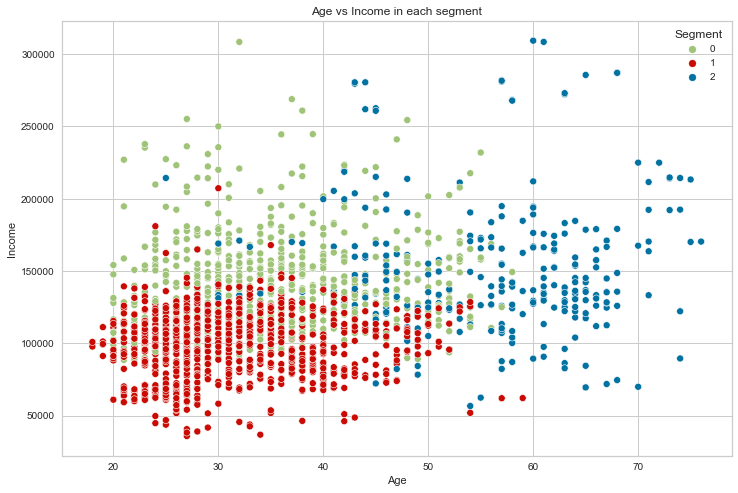

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_customers_kmeans['Age'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','b']
)

plt.title('Age vs Income in each segment')
plt.show()

### Education vs Income  <a name="ch3_5_2"></a>

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:xlabel='Education', ylabel='Income'>

Text(0.5, 1.0, 'Education vs Income in each segment')

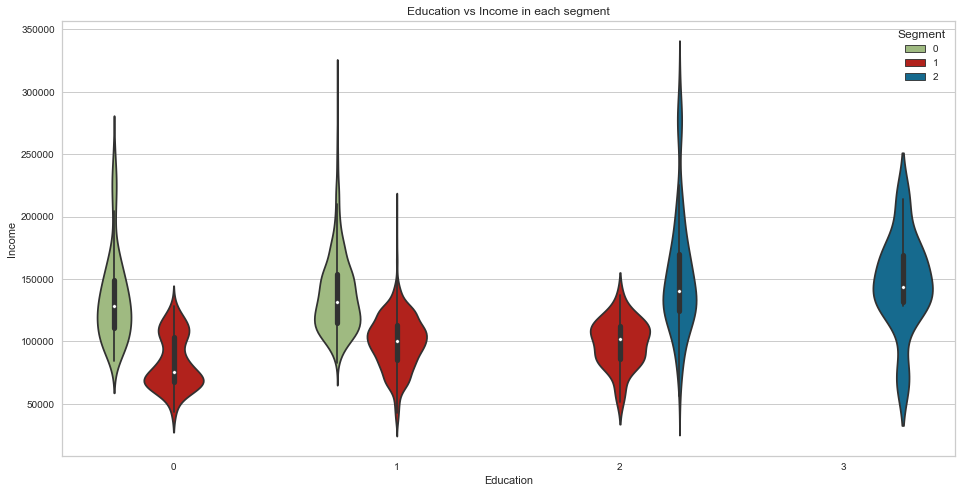

In [ ]:
plt.figure(figsize=(16, 8))
sns.violinplot(
    x=df_customers_kmeans['Education'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','b']
)
plt.title('Education vs Income in each segment')
plt.show()

## (...)

# 4. Improve k-means with PCA  <a name="ch4"></a>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(customers_scaled)

pca.explained_variance_ratio_

PCA()

array([0.34103573, 0.23178599, 0.16650585, 0.09955452, 0.06169548,
       0.04785186, 0.03407515, 0.01749541])

## 4.1 Plot the explained variance against the number of components  <a name="ch4_1"></a>

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Explained Variance')

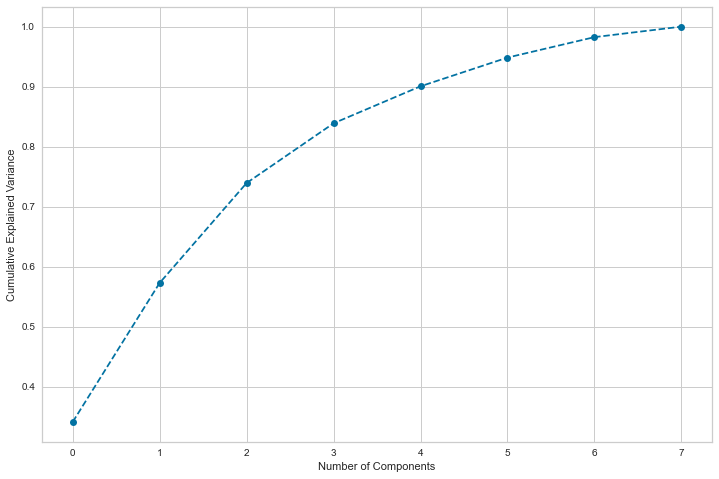

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

## Question:   <a name="chq_4"></a>

## How many components to explain above 90% of the data variance?

**Use 4 components and fit the PCA model**

In [ ]:
pca = PCA(n_components=4)
pca.fit(customers_scaled)

df_pca_components = pd.DataFrame(
    data=pca.components_,
    columns=df_customers.columns.values,
    index=['PC1', 'PC2', 'PC3', 'PC4'])

df_pca_components

PCA(n_components=4)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
PC1,-0.345410,-0.328586,-0.187269,0.270283,0.104515,0.483844,0.461681,0.454337
PC2,0.107237,0.421320,0.472083,0.355260,0.652786,0.176284,0.061362,-0.030777
PC3,0.143522,-0.317959,-0.485433,0.613442,0.252258,-0.123601,-0.344566,-0.262126
PC4,-0.841192,-0.122875,0.246106,0.014076,0.139848,-0.284926,-0.339762,-0.018802


## 4.2. New correlation matrix for the four selected components   <a name="ch4_2"></a>

Text(0.5, 1.0, 'Correlation Matrix')

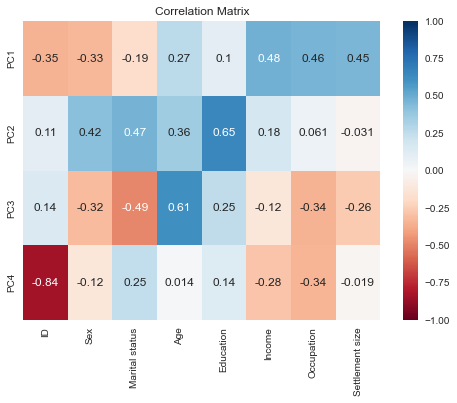

In [ ]:
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

## 4.3 Implementing K-Means Clustering considering the 4 PC as features   <a name="ch4_3"></a>

#### consider also 3 clusters to compare the improvements of using PCA

In [ ]:
pca_scores = pca.transform(customers_scaled)

km.fit(pca_scores)

KMeans(n_clusters=3, random_state=0)

In [ ]:
df_segm_pca = pd.concat([df_customers.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-4:] = ['PC1', 'PC2', 'PC3', 'PC4']
df_segm_pca['K-means PCA'] = km.labels_

df_segm_pca

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC1,PC2,PC3,PC4,K-means PCA
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2.036586,1.428485,0
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,-2.433785,1.190092,2
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,1.974083,2.014387,2
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,0.635332,0.836900,2
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1.127543,1.013575,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-1.485348,0.432286,1.615196,-1.395080,1
1996,100001997,1,1,27,1,117744,1,0,-1.672129,0.839600,-0.923547,-1.417292,1
1997,100001998,0,0,31,0,86400,0,0,-1.841798,-2.158681,1.116012,-1.126136,1
1998,100001999,1,1,24,1,97968,0,0,-2.716832,0.561390,-0.476253,-0.743730,1


## Question: <a name="chq_4"></a>
## How to analyze/compare if the kmeans results (with 3 clusters) were improved by projecting the data into 4 PC?

In [ ]:
#place your code here

## 4.4 Analyze segmentation results   <a name="ch4_4"></a>

In [ ]:
df_segm_pca.mean()
df_segm_pca.groupby(['K-means PCA'])['ID'].nunique()

df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(4)
df_segm_pca_analysis

ID                 1.000010e+08
Sex                4.570000e-01
Marital status     4.965000e-01
Age                3.590900e+01
Education          1.038000e+00
Income             1.209544e+05
Occupation         8.105000e-01
Settlement size    7.390000e-01
PC1               -9.718892e-16
PC2                1.603162e-16
PC3               -2.868261e-16
PC4                3.068656e-16
K-means PCA        1.253500e+00
dtype: float64

K-means PCA
0    289
1    915
2    796
Name: ID, dtype: int64

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC1,PC2,PC3,PC4
K-means PCA,,,,,,,,,,,,
0,1.000008e+08,0.5087,0.6920,55.3979,2.1246,151734.1176,1.0173,1.0000,1.3082,2.1266,0.9215,0.2335
1,1.000014e+08,0.7148,0.6055,31.0295,0.9235,97185.7760,0.4306,0.1530,-1.4675,-0.0078,-0.0114,-0.1843
2,1.000006e+08,0.1420,0.3003,34.4422,0.7751,137101.3731,1.1721,1.3178,1.2119,-0.7631,-0.3215,0.1271


(this analysis must be supported by graphs and detailed summarization!!!!)

- **Cluster 0**: mostly non-single men and women with average age of 55 yo, with income above the average, mostly employed (oficial), with univ-level education and, generally, from mid-size cities. 
  
- **Cluster 1**: (...)

- **Cluster 2**: (...)

## 4.5. Visualization of the segments with respect to the first two components   <a name="ch4_5"></a>

In [ ]:
#place your code here

# Further work:   <a name="ch_fw"></a>

Using PCA, and groupring the data with 4 clusters, aswer the following questions:
(repeat 4.3, 4.4 and 4.5)
- compare the clustering using 3 and 4 clusters (for the projected data with 4 PC)
- analyze the segmentation results (describing the 4 clusters)
- vizualize the segments with respect to the first two components.